<font size="6">Введение в обработку текстов</font>

# Два пути

Допустим, перед вами стоит задача автоматически выделить новости, относящиеся к разным тематикам: политические, спортивные, экономические и научные. К её решению можно подойти двумя способами.

<center><img src="https://i.postimg.cc/wBBXW9gW/News-classification.png" width="450"></center>

**Вариант №1: подход на основе правил (rule-based)**

Будем использовать **вручную** заданные **правила** классификации и тематически размеченные **словари**. Эти правила определяют класс текста на основе ключевых слов. Однако чем больше примеров мы будем анализировать, тем больше исключений будет появляться.

Следовательно, потребуется добавлять новые правила и увеличивать размер словаря. Алгоритмическая сложность программы будет расти, ее будет сложнее поддерживать.

**Вариант №2: машинное обучение (machine learning)**

С появлением **машинного обучения** мы можем применить принципиально другой подход. Он заключается в том, чтобы обучить модель, которая сама будет извлекать шаблоны из данных.

Соберем некоторое количество новостей за определенное время и вручную разметим их тематики. Загрузим данные в модель, и она обучится на этих данных. При достаточном количестве данных и адекватно подобранной модели мы сможем научить ее решать конкретные задачи.

<center><img src="https://i.postimg.cc/PJ1YLxQq/rule-based-vs-machine-learning.png" width="650"></center>

В ходе данного курса мы рассмотрим, как применять методы машинного обучения для работы с текстовыми данными и решать различные задачи.

# План исследования

Допустим, мы решили заняться разработкой классификатора новостей. Как будет выглядеть план исследования?

<center><img src="https://i.postimg.cc/N0VHpTNM/pipeline.png" width="750"></center>

## Инструменты

В ходе курса мы будем опираться на существующие методы, реализованные в следующих основных библиотеках:

* [NLTK](https://www.nltk.org/) — инструменты для предобработки текстов.
- [RNNmorph](https://github.com/IlyaGusev/rnnmorph) — морфологический парсер для русского и английского языков.
- [UDPipe](https://ufal.mff.cuni.cz/udpipe) — морфологический и синтаксический парсер для различных языков.
* [NumPy](https://numpy.org/) — поддержка больших многомерных массивов и быстрых математических функций для операций с этими массивами.
* [Scikit-learn](https://scikit-learn.org/stable/) — ML алгоритмы, "toy"-датасеты.
* [Pandas](https://pandas.pydata.org/) — удобная работа с табличными данными.
* [PyTorch](https://pytorch.org/) — основной фреймворк машинного обучения, который будет использоваться на протяжении всего курса.
* [Matplotlib](https://matplotlib.org/) — основная библиотека для визуализации. Вывод различных графиков.
* [Seaborn](https://seaborn.pydata.org/) — удобная библиотека для визуализации статистик. Прямо из коробки вызываются и гистограммы, и тепловые карты, и визуализация статистик по датасету, и многое другое.

## Сбор данных

Где можно добыть данные?

* [HuggingFace](https://huggingface.co/datasets)
* [Соревнования Kaggle](https://www.kaggle.com/datasets)
* [Google Datasets](https://datasetsearch.research.google.com/)
* [Papers with Code](https://paperswithcode.com/)

Если вы используете данные, скачанные из сети, проверьте, откуда они. Описаны ли они в статье? Если да, посмотрите на документ, убедитесь, что он был опубликован в авторитетном месте, и проверьте, упоминают ли авторы какие-либо ограничения на использованные датасеты.

Если данные использовались в ряде работ, это еще не гарантирует высокое качество датасета. **Иногда данные используются только потому, что их легко достать**.

## Разведочный анализ данных

**Разведочный анализ данных/ Exploratory data analysis (EDA)** — анализ основных свойств данных, нахождение в них общих закономерностей, зачастую с использованием инструментов визуализации.

<center><img src ="https://i.postimg.cc/3NrYGfgD/eda.png" width="450"></center>

## Предобработка текста

Текстовые данные содержат различный «шум»: знаки препинания, чередование строчных и прописных символов, служебные слова. Для работы с текстовыми данными их необходимо упростить и привести к стандартной форме, которая подходит для используемого алгоритма.

Результатом предобработки станет набор содержательных слов нижнего регистра в начальной форме без знаков препинания.

Стандартная процедура предварительной обработки включает следующие этапы:
- токенизация текста;
- удаление знаков препинания и чисел;
- приведение к нижнему регистру;
- удаление стоп-слов;
- стемминг/ лемматизация.

<center><img src ="https://i.postimg.cc/6qQxq2Xr/text-preprocessing.png" width="400" ></center>

Чтобы унифицировать и структурировать текст, нужно разделить его на более мелкие единицы анализа. Процесс разделения больших блоков текста (предложений, абзацев) на более маленькие единицы называется **токенизацией**.

<center><img src ="https://i.postimg.cc/CKC34HMC/tokenizer.png" width="600" ></center>

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "Hey, did you know that the summer break is coming? \
Amazing right!! It's only 5 more days!!"
tokenized_text = word_tokenize(text)
print(f'Source text: {text}')
print(f'Tokenized text: {tokenized_text}')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Source text: Hey, did you know that the summer break is coming? Amazing right!! It's only 5 more days!!
Tokenized text: ['Hey', ',', 'did', 'you', 'know', 'that', 'the', 'summer', 'break', 'is', 'coming', '?', 'Amazing', 'right', '!', '!', 'It', "'s", 'only', '5', 'more', 'days', '!', '!']


Необходимо удалить элементы предложения, которые не являются словами: знаки препинания, специальные символы, числа. Они не содержат важной информации о смысловой характеристики текста и не будут полезны при классификации.

Для обеспечения непротиворечивости при обработке текста необходимо привести все слова к нижнему регистру. Этот этап повозлит уменьшить размер словаря текстовых данных.

<center><img src ="https://i.postimg.cc/Xqqt3Rfx/normalization.png" width="700" ></center>

In [ ]:
lowercased_text = [word.lower() for word in tokenized_text if word.isalpha()]
print(f'Tokenized text: {tokenized_text}')
print(f'Lowercased text: {lowercased_text}')

Tokenized text: ['Hey', ',', 'did', 'you', 'know', 'that', 'the', 'summer', 'break', 'is', 'coming', '?', 'Amazing', 'right', '!', '!', 'It', "'s", 'only', '5', 'more', 'days', '!', '!']
Lowercased text: ['hey', 'did', 'you', 'know', 'that', 'the', 'summer', 'break', 'is', 'coming', 'amazing', 'right', 'it', 'only', 'more', 'days']


Необходимо удалить стоп-слова — это часто используемые слова, которые не вносят никакой дополнительной информации в текст. В билиотеке [NLTK](https://www.nltk.org/) есть встроенный список стоп-слов, которым мы воспользуемся.

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(f"Stopwords in English: {stopwords.words('english')}")

Stopwords in English: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
STOPWORDS = stopwords.words('english')
text_without_stopwords = [word for word in lowercased_text if word not in STOPWORDS]
print(f'Lowercased text: {lowercased_text}')
print(f'Text without stopwords: {text_without_stopwords}')

Lowercased text: ['hey', 'did', 'you', 'know', 'that', 'the', 'summer', 'break', 'is', 'coming', 'amazing', 'right', 'it', 'only', 'more', 'days']
Text without stopwords: ['hey', 'know', 'summer', 'break', 'coming', 'amazing', 'right', 'days']


В тексте одно и то же слово может встретиться в разной грамматической форме. Чтобы привести все токены к их словарной форме и сократить размер словаря, используется один из двух подходов для нормализации текста:

- Лемматизация — процесс приведения словоформы к лемме, то есть её нормальной (словарной) форме. Для его применения необходима информация о части речи и морфологической форме анализируемого слова, что требует анализа контекста.
- Стемминг — эвристический процесс нахождения основы для заданного слова. Он осуществляется на основе списка наиболее распространенных окончаний и словообразовательных суффиксов.

<center><img src ="https://i.postimg.cc/PfDRbQ6C/stem-lemmatize.png" width="700" ></center>

In [ ]:
from nltk import PorterStemmer

stemmer = PorterStemmer()
stemmed_text = [stemmer.stem(word) for word in text_without_stopwords]
print(f'Text without stopwords: {text_without_stopwords}')
print(f'Stemmed text: {stemmed_text}')

Text without stopwords: ['hey', 'know', 'summer', 'break', 'coming', 'amazing', 'right', 'days']
Stemmed text: ['hey', 'know', 'summer', 'break', 'come', 'amaz', 'right', 'day']


По аналогии со стеммером, создадим лемматизатор — объект класса `WordNetLemmatizer`и осуществим лемматизацию с помощью метода `lemmatize()`.

In [ ]:
nltk.download('wordnet')
from nltk import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatized_text = [lemmatizer.lemmatize(word) for word in text_without_stopwords]
print(f'Text without stopwords: {text_without_stopwords}')
print(f'Lemmatized text: {lemmatized_text}')

[nltk_data] Downloading package wordnet to /root/nltk_data...


Text without stopwords: ['hey', 'know', 'summer', 'break', 'coming', 'amazing', 'right', 'days']
Lemmatized text: ['hey', 'know', 'summer', 'break', 'coming', 'amazing', 'right', 'day']


Можно заметить, что лемматизация применилась только к существительному "days". По умолчанию параметр `pos` (part of speech) лемматизатора `WordNetLemmatizer` имеет значение `"n"` (noun). Другие возможные значения: `"v"` (verb) для глаголов, `"a"` (adjective) для прилагательных и `"r"` (adverb) для наречий.

In [ ]:
print(f'Lemma for word "broke" is {lemmatizer.lemmatize("broke", "v")}.')
print(f'Lemma for word "better" is {lemmatizer.lemmatize("better", "a")}.')

Lemma for word "broke" is break.
Lemma for word "better" is good.


Метод `pos_tag()` позволяет автоматически определять часть речи для всех слов предложения, а также содержит дополнительную грамматическую информацию.

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(text_without_stopwords)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('hey', 'NN'),
 ('know', 'VBP'),
 ('summer', 'NN'),
 ('break', 'NN'),
 ('coming', 'VBG'),
 ('amazing', 'JJ'),
 ('right', 'NN'),
 ('days', 'NNS')]

Можно заметить, что частеречные теги лемматизатора и pos-теггера различаются. Напишем функцию, которая будет заменять теги pos-тэггера на теги лемматизатора по словарю соответствия и возвращать для каждого токена аналогичный кортеж `(слово, тег)`.

In [ ]:
from nltk.corpus import wordnet

def pos_mapping(text):
    word_tag_array = []
    for word_tag in nltk.pos_tag(text):
        tag = word_tag[1][0]
        tag_dict = {"J": "a",
                    "N": "n",
                    "V": "v",
                    "R": "r"}
        word_tag_array.append((word_tag[0], tag_dict[tag]))
    return word_tag_array

pos_mapping(text_without_stopwords)

[('hey', 'n'),
 ('know', 'v'),
 ('summer', 'n'),
 ('break', 'n'),
 ('coming', 'v'),
 ('amazing', 'a'),
 ('right', 'n'),
 ('days', 'n')]

Теперь можем осуществить лемматизацию всех частей речи.

In [ ]:
lemmatized_text = [lemmatizer.lemmatize(word, tag) for word, tag in pos_mapping(text_without_stopwords)]
print(f'Text without stopwords: {text_without_stopwords}')
print(f'Lemmatized text: {lemmatized_text}')

Text without stopwords: ['hey', 'know', 'summer', 'break', 'coming', 'amazing', 'right', 'days']
Lemmatized text: ['hey', 'know', 'summer', 'break', 'come', 'amazing', 'right', 'day']


В завершение необходимо объединить список токенов обратно в строку через пробел.

In [ ]:
final_text = ' '.join(stemmed_text)
print(f'Stemmed text: {stemmed_text}')
print(f'Final text: {final_text}')

Stemmed text: ['hey', 'know', 'summer', 'break', 'come', 'amaz', 'right', 'day']
Final text: hey know summer break come amaz right day


## Векторизация текста

Методы машинного обучения работают с числами. Нам нужно найти способы, которые позволят представлять тексты в виде числовых данных.

Если объектом является текст, в качестве признаков выступают слова, которые он содержит. Процесс преобразования текста в числа называется **векторизацией**.

<center><img src ="https://i.postimg.cc/QtT0bjJ2/vectorization.webp" width="500" ></center>

Рассмотрим два способа векторизации предложений из библиотеки [scikit-learn](https://scikit-learn.org/stable/).

Для наглядности будем использовать небольшой корпус из трех предложений.

In [ ]:
import pandas as pd
corpus = pd.Series(['She loves pizza, pizza is delicious.',
                     'She is good person.',
                     'Good people are the best.'])

### Мешок слов

<center><img src ="https://i.postimg.cc/VNSRfzpJ/bag-of-words.png" width="600" ></center>

Мешок слов (bag of words) — представление текста, которое описывает вхождение слова в документ.

Реализуем векторизацию мешком слов с помощью класса [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Метод `fit` собирает словарь, метод `transform` преобразует тексты в векторы на основе собранного словаря. Метод `fit_transform` выполняет все это сразу.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
#bow.fit(corpus)
#corpus_bow = bow.transform(corpus)
corpus_bow = bow.fit_transform(corpus)
corpus_bow

<3x11 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

В результате мы получаем разрежённую (sparse) матрицу — это матрица с преимущественно нулевыми элементами. Если бо́льшая часть элементов матрицы ненулевая, она считается плотной (dense). Особенностью разреженных матриц является их компактность. Подробнее про [разреженные матрицы](https://python-school.ru/blog/python/sparse-matrix/).

Выведем результат для всех предложений.

In [ ]:
import pandas as pd

bow_df = pd.DataFrame(corpus_bow.toarray(),
                      columns = bow.get_feature_names_out(),
                      index=corpus)
bow_df

,are,best,delicious,good,is,loves,people,person,pizza,she,the
"She loves pizza, pizza is delicious.",0,0,1,0,1,1,0,0,2,1,0
She is good person.,0,0,0,1,1,0,0,1,0,1,0
Good people are the best.,1,1,0,1,0,0,1,0,0,0,1


По умолчанию в качестве признаков используются слова (униграммы). С помощью параметра `ngram_range` можно считать частоту встречаемости для *n*-грамм. Необходимо задать значения `min_n` и `max_n` (`default=(1, 1)`).

Создадим векторизатор, использующий биграммы и триграммы в качестве признаков (*n* от 2 до 3). Применим векторизатор к текстам корпуса.

In [ ]:
bow1 = CountVectorizer(ngram_range=(2,3))
corpus_bow1 = bow1.fit_transform(corpus)
corpus_bow1

<3x21 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [ ]:
bow1_df = pd.DataFrame(corpus_bow1.toarray(),
                      columns = bow1.get_feature_names_out(),
                      index=corpus)
bow1_df

,are the,are the best,good people,good people are,good person,is delicious,is good,is good person,loves pizza,loves pizza pizza,...,people are the,pizza is,pizza is delicious,pizza pizza,pizza pizza is,she is,she is good,she loves,she loves pizza,the best
"She loves pizza, pizza is delicious.",0,0,0,0,0,1,0,0,1,1,...,0,1,1,1,1,0,0,1,1,0
She is good person.,0,0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,1,1,0,0,0
Good people are the best.,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


Параметр `analyzer` определяет, какая единица предложения является признаком — целое слово или подслово. По умолчанию он принимает значение `'word'`. Для использования символьных *n*-грамм нужно установить значение `'char'` (границы слов включаются в *n*-граммы) или `'char_wb'` (создает *n*-граммы символов только из текста внутри границ слов).

In [ ]:
bow2 = CountVectorizer(ngram_range=(3,4), analyzer='char_wb')
corpus_bow2 = bow2.fit_transform(corpus)
corpus_bow2

<3x97 sparse matrix of type '<class 'numpy.int64'>'
	with 114 stored elements in Compressed Sparse Row format>

In [ ]:
bow2_df = pd.DataFrame(corpus_bow2.toarray(),
                      columns = bow2.get_feature_names_out(),
                      index=corpus)
bow2_df

,ar,are,be,bes,de,del,go,goo,is,is,...,us.,us.,ves,ves,za,"za,","za,",zza,zza,"zza,"
"She loves pizza, pizza is delicious.",0,0,0,0,1,1,0,0,1,1,...,1,1,1,1,1,1,1,2,1,1
She is good person.,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Good people are the best.,1,1,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bow2.get_feature_names_out()

array([' ar', ' are', ' be', ' bes', ' de', ' del', ' go', ' goo', ' is',
       ' is ', ' lo', ' lov', ' pe', ' peo', ' per', ' pi', ' piz', ' sh',
       ' she', ' th', ' the', 'a, ', 'are', 'are ', 'bes', 'best', 'cio',
       'ciou', 'del', 'deli', 'eli', 'elic', 'eop', 'eopl', 'ers', 'erso',
       'es ', 'est', 'est.', 'goo', 'good', 'he ', 'ici', 'icio', 'iou',
       'ious', 'is ', 'izz', 'izza', 'le ', 'lic', 'lici', 'lov', 'love',
       'n. ', 'od ', 'on.', 'on. ', 'ood', 'ood ', 'opl', 'ople', 'ous',
       'ous.', 'ove', 'oves', 'peo', 'peop', 'per', 'pers', 'piz', 'pizz',
       'ple', 'ple ', 're ', 'rso', 'rson', 's. ', 'she', 'she ', 'son',
       'son.', 'st.', 'st. ', 't. ', 'the', 'the ', 'us.', 'us. ', 'ves',
       'ves ', 'za ', 'za,', 'za, ', 'zza', 'zza ', 'zza,'], dtype=object)

### TF-IDF

$TF{\text -}IDF$ ($TF$ — term frequency, $IDF$ — inverse document frequency)  — это способ векторизации текста, отражающий важность слова в документе, а не только частоту его появления.

Частота слов ($TF$) — это мера частоты употребления слова $w$ в документе $d$. $TF$ определяется как отношение появления слова в документе к общему количеству слов в документе.

$$TF(w,d) = \frac{количество\:вхождений\:слова\:w\:в\:документе\:d}{общее\:количество\:слов\:n\:в\:документе\:d}$$

Обратная частота документов ($IDF$) —  это мера важности слова. Некоторые слова могут присутствовать наиболее часто, но не имеют большого значения. $IDF$ присваивает вес каждому слову в зависимости от его частоты в корпусе $D$.

$$IDF(w,D) = ln(\frac{общее\:количество\:документов\:N\:в\:корпусе\:D}{количество\:документов,\:содержащих\:слово\:w})$$

$TF{\text -}IDF$ является произведением $TF$ и $IDF$.
$$TF{\text -}IDF(w,d,D)=TF(w,d)*IDF(w,D)$$

<center><img src ="https://i.postimg.cc/pd8Fcr3J/tf-idf.png" width="500" ></center>

Воспользуемся классом [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) для векторизации. Применим метод `fit_transform` и посмотрим на результат.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
corpus_tfidf = tfidf.fit_transform(corpus)
corpus_tfidf

<3x11 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_df = pd.DataFrame(corpus_tfidf.toarray(),
                      columns = tfidf.get_feature_names_out(),
                      index=corpus)
tfidf_df

,are,best,delicious,good,is,loves,people,person,pizza,she,the
"She loves pizza, pizza is delicious.",0.000000,0.000000,0.373801,0.000000,0.284285,0.373801,0.000000,0.000000,0.747602,0.284285,0.000000
She is good person.,0.000000,0.000000,0.000000,0.459854,0.459854,0.000000,0.000000,0.604652,0.000000,0.459854,0.000000
Good people are the best.,0.467351,0.467351,0.000000,0.355432,0.000000,0.000000,0.467351,0.000000,0.000000,0.000000,0.467351


Можно ограничить размер словаря и включать только слова, которые встречаются не реже N раз(`min_df`). Также можно убрать слова, которые встречаются слишком часто и являются стоп-словами в пределах данного корпуса (`max_df`). Оба параметра могут быть выражены целым числом либо числом с плавающей точкой в диапазоне [0.0, 1.0].

In [ ]:
tfidf1 = TfidfVectorizer(min_df=2)
corpus_tfidf1 = tfidf1.fit_transform(corpus)
corpus_tfidf1

<3x3 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf1_df = pd.DataFrame(corpus_tfidf1.toarray(),
                      columns = tfidf1.get_feature_names_out(),
                      index=corpus)
tfidf1_df

,good,is,she
"She loves pizza, pizza is delicious.",0.00000,0.707107,0.707107
She is good person.,0.57735,0.577350,0.577350
Good people are the best.,1.00000,0.000000,0.000000


## Обучение модели

Рассмотрим алгоритмы, которые из-за простоты использования удобно применять в качестве базовой (baseline) модели. Более сложные алгоритмы практически всегда, будут работать лучше, НО помимо качества в практических задачах часто есть много других требований и ограничений (скорость, память, интерпретируемость), которые могут перевесить разницу в точности.

### Наивный байесовский классификатор

Наивный байесовский классификатор принимает решение по вероятностям, рассчитаным на обучающем корпусе. При предсказании выбирается класс, набравший наибольшую оценку. Наивным такой классификатор называется, потому что делается предположение о независимости слов в документе друг от друга.

Для каждого класса $c$ требуется найти $P(c|d)$ — вероятность класса $c$ для документа $d$. Она рассчитывается по формуле Байеса:

$$P(c|d) = \frac{P(d|c) P(c)} {P(d)}$$

Среди значений $P(c|d)$ для всех классов выбирается $\hat c$, набравший наибольшую оценку.

$$\hat c = \underset{c \in C }{\operatorname{argmax}} P(c|d) = \underset{c \in C }{\operatorname{argmax}} \frac{P(d|c)P(c)} {P(d)}$$

Значение в знаменателе одинаково для всех классов, поэтому его можно опустить.

$$\hat c = \underset{c \in C }{\operatorname{argmax}} P(d|c)P(c) $$

$P(c)$: вероятность класса $c$ — это доля документов класса $c$ среди всех документов.

$P(d|c)$: вероятность документа $d$ для класса $c$ зависит от слов $x_1, x_2, ..., x_n$, входящих в документ:

$$P(d|c) = P(x_1,x_2,...,x_n|c) = P(x_1|c)P(x_2|c)...P(x_n|c) $$

### Логистическая регрессия

Общее назначение регрессии состоит в анализе связи между несколькими независимыми переменными и зависимой переменной. Зависимая переменная $z$ является взвешенной суммой независимых переменных $x_1,x_2,...,x_n$ (признаков). Веса $w_1, w_2, ..., w_n$ подбираются на обучающих данных — в этом и состоит обучение модели.

Переменная $z$ может принимать значения в любом диапазоне. Чтобы получить вероятность отнесения объекта к классу, нужно привести его в диапазон от 0 до 1 с помощью функции активации. В случае бинарной классификации используется сигмоида.

<center><img src="https://i.postimg.cc/zBFR5MzL/logistic-regression.png" width="900"></center>

Для многоклассовой классификации используется функция активации softmax.  Вероятность $i$-го класса при наличии $K$ классов рассчитывается следующим образом:

$$\text{softmax}(z_{i}) = \frac{e^{z_i}}{\sum_{j=1}^K e^{z_j}}$$
$$i=1,...,K$$

Для каждого объекта выбирается класс с наибольшей вероятностью.

Запишем формулу для функции софтмакс.  Используем `np.exp(x)` из библиотеки [numpy](https://numpy.org/doc/stable/index.html#) для подсчета $e^x$ и `np.sum()` для подсчета суммы.

In [ ]:
import numpy as np

def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

z = np.array([2.6, 3.2, 0.5])

print(softmax(z))
print(f"softmax(z_0) = {softmax(z)[0].round(2)}")
print(f"softmax(z_1) = {softmax(z)[1].round(2)}")
print(f"softmax(z_2) = {softmax(z)[2].round(2)}")
print(f"sum = {softmax(z)[0] + softmax(z)[1] + softmax(z)[2]}")

[0.33960756 0.61880531 0.04158713]
softmax(z_0) = 0.34
softmax(z_1) = 0.62
softmax(z_2) = 0.04
sum = 1.0


### Дерево решений

Дерево решений представляет собой иерархическую древовидную структуру, состоящую из правила вида «Если ..., то ...». За счет обучающего множества правила генерируются автоматически в процессе обучения.

Деревья решений включают в себя элементы двух типов — узлы (node) и листья (leaf). Узлы включают в себя решающие правила и производят проверку примеров на соответствие правилу. Примеры попадают в узел и разбиваются на два подмножества:
- удовлетворяют установленному правилу
- не удовлетворяют установленному правилу

Далее к каждому подмножеству применяется новое правило. Последний узел, когда не осуществляется проверка и разбиение, становится листом. Лист определяет класс для каждого попавшего в него примера. Пример попадает в лист, если соответствует всем правилам на пути к нему.

<center><img src="https://i.postimg.cc/wvg7WVX9/decision-tree.png" width="1000"></center>

### Метод случайного леса

Метод случайного леса — алгоритм машинного обучения, заключающийся в использовании ансамбля решающих деревьев. Каждое дерево строится на случайном подмножестве обучающих данных и случайном подмножестве признаков. В результате каждое дерево в ансамбле получается немного разным, что позволяет уменьшить эффект переобучения и повысить качество предсказаний.

Для построения каждого дерева случайного леса происходит следующее:
1. Случайным образом выбирается подмножество обучающих объектов из всего набора данных.
2. Случайным образом выбирается подмножество признаков. Это позволяет уменьшить корреляцию между деревьями в ансамбле и улучшить их разнообразие.
3. Строится дерево решений на выбранном подмножестве данных и признаков.

После построения всех деревьев в ансамбле для каждого объекта данных происходит голосование по всем деревьям. Наиболее популярный класс становится предсказанным классом.

# Оценка качества

Как оценивать качество алгоритма? Допустим, вы хотите внести изменения в алгоритм. Откуда вы знаете что эти изменения сделают алгоритм лучше? Конечно же, надо проверять алгоритм на реальных данных.

Основой проверки является тестовая выборка. Для того чтобы принимать решение, хуже или лучше справляется с работой новая версия алгоритма, нам необходима численная метрика его качества.

## Метрики для бинарной классификации

Для оценки качества классификации используется матрица ошибок.

Есть алгоритм, предсказывающий принадлежность каждого объекта одному из классов.
- $\hat y$ — предсказанный алгоритмом класс объекта
- $y$ — истинный класс объекта

Два класса делятся на положительный (1) и отрицательный (0 или –1).
- Объекты, которые алгоритм относит к положительному классу, – положительные (Positive).
- Те, которые на самом деле принадлежат к этому классу, – истинно положительные (True Positive).
- Остальные – ложно положительные (False Positive).

Аналогичная терминология для отрицательного (Negative) класса.

Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

\begin{array}{|c|c|} \hline
& y=1 & y=0 \\ \hline
\hat{y}=1 & \text{True Positive (TP)} & \text{False Positive (FP)}  \\ \hline
\hat{y}=0 & \text{False Negative (FN)} & \text{True Negative (TN)} \\ \hline
\end{array}

Каждый объект изначально относится к одному из классов:
- является фотографией кота → положительный класс (positive, $y=1$).
- является фотографией собаки → отрицательный класс (negative, $y=0$).

Модель может предсказать, является объект фотографией кота (true, $\hat y = 1$) или собаки (false, $\hat y = 0$).

Пусть какой-то набор признаков характерен для изображения кота.
- Модель верно определила и поставила положительный класс → истинно положительный исход (true positive).
- Модель ставит отрицательную метку класса → ложно отрицательный исход (false negative): модель «сказала», что на фотографии изображена собака, но на самом деле изображен кот.

В случае, если на фотографии изображена собака, исходы модели остаются аналогичными.
- Модель относит объект к положительному классу → ложно положительный исход (false positive): модель «сказала», что на фотографии изображен кот, но на самом деле изображена собака.
- Модель определят письмо как отрицательный класс → истинно отрицательный исход (true negative).

<center><img src="https://i.postimg.cc/4NmnFn9H/confusion_matrix.png" width="500"></center>

Матрица ошибок используется для подсчета метрик качества классификации.

### Accuracy

Accuracy — доля правильных ответов алгоритма среди всех ответов:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

Эта метрика непоказательна в задачах с неравными классами.

Допустим, мы хотим оценить работу спам-фильтра почты.

- У нас есть 100 не-спам писем (отрицательный класс).
  - 90 из них классификатор определил верно,
  - остальные 10 – неверно.
- Также есть 10 спам-писем (положительный класс).
  - 6 из них классификатор определил верно,
  - остальные 4 – неверно.

Посчитаем accuracy.

In [ ]:
TP = 6
TN = 90
FP = 10
FN = 4
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.8727272727272727

Что будет, если мы просто будем предсказывать все письма как не-спам?

In [ ]:
TP = 0
TN = 100
FP = 0
FN = 10
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9090909090909091

При этом, наша модель совершенно не обладает никакой предсказательной силой, так как изначально мы хотели определять письма со спамом. Преодолеть это нам поможет переход с общей для всех классов метрики к отдельным показателям качества классов.

### Точность, полнота, F-мера

Точность — доля объектов, названных классификатором положительными и при этом действительно являющимися положительными.

$$Precision = \frac{TP}{TP + FP}$$

Полнота — доля объектов положительного класса, которые нашел алгоритм, из всех объектов положительного класса.

$$Recall = \frac{TP}{TP + FN}$$

Полнота демонстрирует способность алгоритма обнаруживать данный класс вообще, а точность — способность отличать этот класс от других классов. Точность и полнота, в отличие от accuracy, не зависят от соотношения классов и потому применимы в условиях несбалансированных выборок.

<center><img src="https://i.postimg.cc/HkjMCMNM/68747470733a2f2f6564756e65742e6b65612e73752f7265706f2f4564754e65742d636f6e74656e742f6465762d322e312f.png" width="700"></center>

F-мера — среднее гармоническое точности и полноты:

$$F{\text -}score=2\frac{Precision×Recall}{Precision+Recall}$$
​
Данная формула придает одинаковый вес точности и полноте, поэтому F-мера будет падать одинаково при уменьшении и точности, и полноты. Можно рассчитать F-меру, придав различный вес точности и полноте.

$$F{\text -}score=(β^2+1)\frac{Precision×Recall}{β^2Precision+Recall}$$
​
$β$ принимает значения в диапазоне, $0<β<1$ если нужно отдать приоритет точности, а при $β>1$ приоритет отдается полноте. При $β=1$ формула сводится к предыдущей, что дает сбалансированную F-меру (также ее называют F1).

## Метрики для многоклассовой класификации

В многоклассовых задачах подсчет качества сводится к вычислению одной из двухклассовых метрик.

Пусть выборка состоит из  $K$  классов. Задача классификации ставится как $K$  задач об отделении класса  $i$  от остальных $(i=1,...,K)$. Для каждой из них можно посчитать свою матрицу ошибок.

Выделяют три подхода:

1. Микроусреднение

Сначала элементы матрицы ошибок усредняются по всем классам. Например $TP = \frac{1}{K}\sum_{i=1}^KTP_i$. Затем по одной усреднённой матрице ошибок считаем точность, полноту, F-меру.

 $$Micro{\text -}precision = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFP_i}$$

 $$Micro{\text -}recall = \frac{\sum_{i=1}^KTP_i}{\sum_{i=1}^KTP_i+\sum_{i=1}^KFN_i}$$

2. Макрусреднение

Сначала вычисляется итоговая метрика для каждого класса, а затем результаты усредняются по всем классам.

$$Macro{\text -}precision = \frac{\sum_{i=1}^KPrecision_i}{K}$$

$$Macro{\text -}recall = \frac{\sum_{i=1}^KRecall_i}{K}$$

3. Взвешивание

Метрики для каждого класса умножаются на его вес, а затем складываются.

$$Weighted{\text -}precision = \sum_{i=1}^K{w_i*Precision_i}$$

$$Weighted{\text -}recall = \sum_{i=1}^K{w_i*Recall_i}$$

$$w_i = \frac{количество \; объектов\; класса\; i}{общее \; количество \; объектов}$$

# Пример работы с данными и моделью

Скачаем набор данных [News Classification Dataset](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset). Он содержит новости на английском языке, размеченные по четырем тематикам: политика (world), спортивные (sport), экономические (business) и научные (science).

## Загрузка и анализ данных

Загрузим данные с гитхаба.

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/news.csv

--2024-10-10 10:27:41--  https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/data/news.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31696262 (30M) [text/plain]
Saving to: ‘news.csv’

news.csv            100%[===================>]  30.23M   133MB/s    in 0.2s    

2024-10-10 10:27:42 (133 MB/s) - ‘news.csv’ saved [31696262/31696262]



В датасете указана тематика новости, ее заголовок и содержание, номер класа.

In [ ]:
import pandas as pd
news = pd.read_csv('news.csv')
news.head()

,Class Label,Title,Description,Class Index
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",3
1,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,3
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,3
3,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,3
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",3


Посмотрим, какое количество новостей каждого класса представлено в датасете.

In [ ]:
news['Class Label'].value_counts()

,count
Class Label,
Business,31900
Science,31900
Sport,31900
World,31900


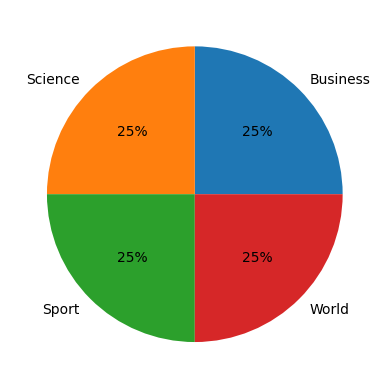

In [ ]:
import matplotlib.pyplot as plt

plt.pie(news['Class Label'].value_counts(), labels=news['Class Label'].unique(),
        autopct='%.0f%%')
plt.show()

Создадим облако слов из новостных статей каждой тематики, чтобы увидеть наиболее часто встречающиеся слова.

Облако слов (Word Cloud) — это визуализация, содержащая слова из некоторого набора данных, при этом размер шрифта прямо пропорционален частотности слова в наборе

In [ ]:
from wordcloud import WordCloud, STOPWORDS
STOPWORDS.update(['said', 'say', 'href', 'quot', 'AP'])

def plot_wordcloud(class_label):
  text = news.Description[news[news['Class Label']==class_label].index]
  plt.figure(figsize = (7,15))
  wc = WordCloud(max_words=500,background_color='White',stopwords=STOPWORDS,random_state=42)
  wc.generate(" ".join(text))
  plt.imshow(wc)
  plt.axis("off")
  plt.show()

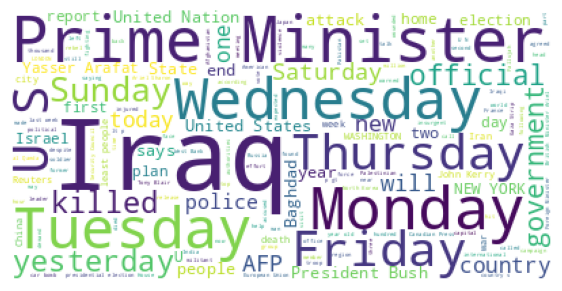

In [ ]:
plot_wordcloud("World")

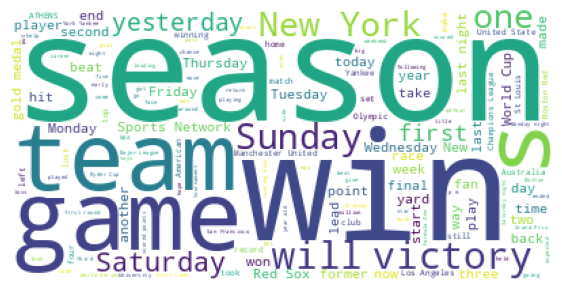

In [ ]:
plot_wordcloud("Sport")

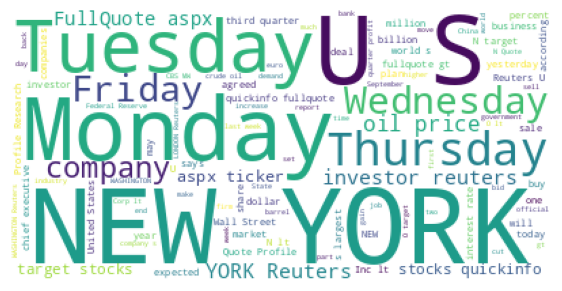

In [ ]:
plot_wordcloud("Business")

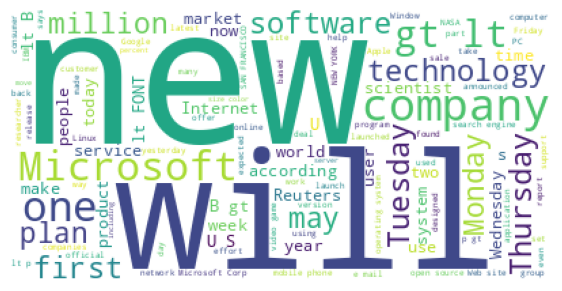

In [ ]:
plot_wordcloud("Science")

## Предобработка и векторизация текста

Объединим заголовок и содержание новости в один столбец.

In [ ]:
news['Summary'] = news['Title'] + ' ' + news['Description']
news.head()

,Class Label,Title,Description,Class Index,Summary
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",3,Wall St. Bears Claw Back Into the Black (Reute...
1,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,3,Carlyle Looks Toward Commercial Aerospace (Reu...
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,3,Oil and Economy Cloud Stocks' Outlook (Reuters...
3,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,3,Iraq Halts Oil Exports from Main Southern Pipe...
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",3,"Oil prices soar to all-time record, posing new..."


Вначале приведем все слова к нижнему регистру и почистим текст: унифицируем сокращения, удалим URL-адреса и HTML-теги.

In [ ]:
import re

def text_clean(x):
    x = str(x).lower()
    x = x.replace('%',' percent').replace('₹',' rupee').replace('$',' dollar').replace('€',' euro')\
                                .replace(',000,000','m').replace('000','k').replace('′',"'").replace("’","'")\
                                .replace("won't","will not").replace("can't",'can not').replace("shouldn't","should not")\
                                .replace("what's",'"what is"').replace("that's",'that is').replace("he's","he is")\
                                .replace("she's","she is").replace("it's","it is").replace("'ve"," have").replace("'re"," are")\
                                .replace("'ll"," will").replace("i'm","i am").replace("n't", " not")
    x = re.sub(r'([0-9]+)000000',r'\1m',x)
    x = re.sub(r'([0-9]+)000',r'\1k',x)
    #remove urls
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    x = url_pattern.sub(r'', x)
    # remove_html
    html_pattern = re.compile('<.*?>')
    x = html_pattern.sub(r'', x)
    return x

In [ ]:
news.Summary=news.Summary.apply(text_clean)
news.head()

,Class Label,Title,Description,Class Index,Summary
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",3,wall st. bears claw back into the black (reute...
1,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,3,carlyle looks toward commercial aerospace (reu...
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,3,oil and economy cloud stocks' outlook (reuters...
3,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,3,iraq halts oil exports from main southern pipe...
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",3,"oil prices soar to all-time record, posing new..."


Осуществим предобработку текста.
Она должна включать:
- токенизацию по словам,
- удаление знаков препинания, чисел и стоп-слов,
- лемматизацию.

На выходе мы хотим получить строку из токенов после предобработки, разделенных пробелами.

Необходимые инструменты для предобработки текстов есть в билиотеке [NLTK](https://www.nltk.org/).

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import WordNetLemmatizer

def pos_mapping(text):
    word_tag_array = []
    for word_tag in nltk.pos_tag(text):
        tag = word_tag[1][0]
        tag_dict = {"J": "a",
                    "N": "n",
                    "V": "v",
                    "R": "r"}
        word_tag_array.append((word_tag[0], tag_dict.get(tag, "n")))
    return word_tag_array

def text_preprocess(text):
    tokenized_text = word_tokenize(text)
    STOPWORDS = set(stopwords.words("english") + ['said', 'href', 'lt','gt',
                                                  'ii','iii','ie','quot','com'])
    text_without_stopwords = [word for word in tokenized_text
                              if word.isalpha() and word not in STOPWORDS]
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word, tag) for word, tag in pos_mapping(text_without_stopwords)]
    return ' '.join(lemmatized_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
news.Summary=news.Summary.apply(text_preprocess)
news.head()

,Class Label,Title,Description,Class Index,Summary
0,Business,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",3,wall bear claw back black reuters reuters wall...
1,Business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,3,carlyle look toward commercial aerospace reute...
2,Business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,3,oil economy cloud stock outlook reuters reuter...
3,Business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,3,iraq halt oil export main southern pipeline re...
4,Business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...",3,oil price soar record pose new menace u econom...


Сравним тексты до и после предобработки.

In [ ]:
for i in range(5,10):
  print(f"Title:\n{news['Title'][i]}")
  print(f"Description:\n{news['Description'][i]}")
  print(f"Summary after normalization:\n{news['Summary'][i]}\n")

Title:
Stocks End Up, But Near Year Lows (Reuters)
Description:
Reuters - Stocks ended slightly higher on Friday\but stayed near lows for the year as oil prices surged past  #36;46\a barrel, offsetting a positive outlook from computer maker\Dell Inc. (DELL.O)
Summary after normalization:
stock end near year low reuters reuters stock end slightly high stay near low year oil price surge past barrel offset positive outlook computer

Title:
Money Funds Fell in Latest Week (AP)
Description:
AP - Assets of the nation's retail money market mutual funds fell by  #36;1.17 billion in the latest week to  #36;849.98 trillion, the Investment Company Institute said Thursday.
Summary after normalization:
money fund fell late week ap ap asset nation retail money market mutual fund fell billion late week trillion investment company institute thursday

Title:
Fed minutes show dissent over inflation (USATODAY.com)
Description:
USATODAY.com - Retail sales bounced back a bit in July, and new claims for job

Запишем в отдельные переменные предобработанные тексты `X` и метки классов `y`.

In [ ]:
X, y = news['Summary'], news['Class Index']
X[:5], y[:5]

(0    wall bear claw back black reuters reuters wall...
 1    carlyle look toward commercial aerospace reute...
 2    oil economy cloud stock outlook reuters reuter...
 3    iraq halt oil export main southern pipeline re...
 4    oil price soar record pose new menace u econom...
 Name: Summary, dtype: object,
 0    3
 1    3
 2    3
 3    3
 4    3
 Name: Class Index, dtype: int64)

Разделим данные на обучающую и тестовую выборку с помощью метода [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) (random_state=42).

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, X_test.shape

((95700,), (31900,))

Чтобы подавать тексты в модель машинного обучения, необходимо представить каждое предложение в виде набора признаков — вектора. В качестве признаков будем подавать модели слова, встретившиеся в обучающей выборке. Те слова, которые встретятся в тестовой выборке, но отсутствуют в обучающей, не могут быть проинтерпретироованы моделью.

Будем использовать алгоритм векторизации TF-IDF. Словарь необходимо собирать на основе обучающей выборки. При этом преобразование текстов в векторы на основе собранного словаря нужно осуществить для всего датасета.

Будем включать в словарь только те слова, которые встретились минимум 5 раз.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(min_df=5)
#vect.fit(X_train)
#X_train_vect = vect.transform(X_train)
X_train_vect = vect.fit_transform(X_train)
X_test_vect = vect.transform(X_test)
X_train_vect, X_test_vect

(<95700x17464 sparse matrix of type '<class 'numpy.float64'>'
 	with 1863132 stored elements in Compressed Sparse Row format>,
 <31900x17464 sparse matrix of type '<class 'numpy.float64'>'
 	with 618552 stored elements in Compressed Sparse Row format>)

## Обучение и тестирование моделей

Для классификации будем использовать готовые методы из библиотеки [scikit-learn](https://scikit-learn.org/stable/) для машинного обучения.

Обучим модели на основе 4 алгоритмов:
- Наивный байесовский классификатор ([MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html))
- Логистическая регрессия ([LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html))
- Дерево решений ([DecisionTreeClassifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
- Метод случайного леса ([RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

У них стандартные функции:
- `fit` обучает модель на обучающей выборке
- `predict` предсказывает классы на тестовой выборке

Составление матрицы ошибок и подсчет всех метрик также может осуществляться инструментами sklearn.
- [матрица ошибок](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- [точность](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- [полнота](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- [F-мера](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Чтобы не считать все метрики по отдельности, можно сразу получить [отчет о классификации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html):
- метрики для каждого класса
  - точность (precision)
  - полнота (recall)
  - F-мера (f1-score)
  - количество объектов каждого класса (support)
- усредненные метрики
  - микроусредненные (micro avg)
  - макроусредненные (macro avg)
  - взвешенные (weighted avg)
  
Если микроусредненные точность, полнота и F-мера равны, выводится одно значение, равное также accuracy.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True emotion')
  plt.xlabel('Predicted emotion')

class_names = ['World', 'Sport', 'Business', 'Science']

### Наивный байесовский классификатор

Обучим модель — [Наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) — и запишем предсказания.

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_vect, y_train)
y_mnb = mnb.predict(X_test_vect)

In [ ]:
for i in range(20,25):
  print(f"Text:\n{news['Description'][X_test.index[i]]}")
  print(f"True label: {class_names[y_test[y_test.index[i]]-1]}")
  print(f"Predicted label: {class_names[y_mnb[i]-1]}\n")

Text:
After several missed calls by the line judge and chair umpire in Tuesday #39;s Jennifer Capriati-Serena Williams match that went against Williams, ESPN Research has compiled the top-10 controversies involving Serena and Venus Williams.
True label: Sport
Predicted label: Sport

Text:
 NEW YORK (Reuters) - Shares of Calpine Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=CPN.N target=/stocks/quickinfo/fullquote"&gt;CPN.N&lt;/A&gt; fell 6  percent before the bell on Tuesday following reports that one  of its joint ventures received a default notice.
True label: Business
Predicted label: Business

Text:
WASHINGTON (AFP) - Revenge is on the mind of the Green Bay Packers as they enter a pivotal National Football League game Sunday at Philadelphia, where the Eagles made an amazing rally to oust them in last season #39;s playoffs.
True label: Sport
Predicted label: Sport

Text:
Credit Suisse will on Monday announce a wide restructuring that will integrate its vola

Выведем отчет о классификации и изобразим матрицу ошибок в виде тепловой карты.

              precision    recall  f1-score   support

       World       0.91      0.89      0.90      7926
       Sport       0.95      0.98      0.96      8075
    Business       0.86      0.87      0.87      7894
     Science       0.88      0.87      0.88      8005

    accuracy                           0.90     31900
   macro avg       0.90      0.90      0.90     31900
weighted avg       0.90      0.90      0.90     31900



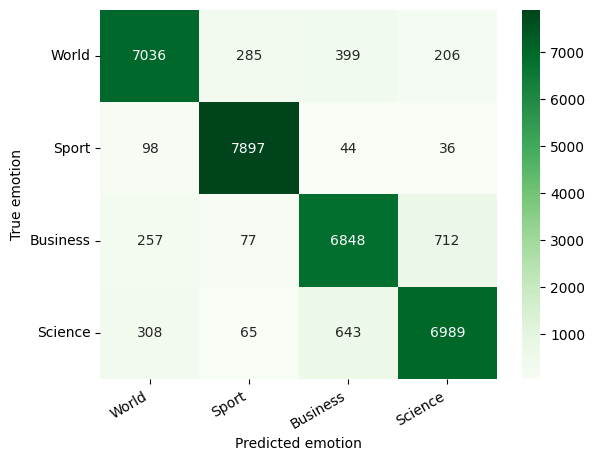

In [ ]:
print(classification_report(y_test, y_mnb, target_names=class_names))

cm = confusion_matrix(y_test, y_mnb)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

### Логистическая регрессия

Обучим модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) и запишем её предсказания.

Укажем количество итераций, равное 200, и случайное состояние 42.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200, random_state=42)
logreg.fit(X_train_vect, y_train)
y_logreg = logreg.predict(X_test_vect)

In [ ]:
for i in range(20,25):
  print(f"Text:\n{news['Description'][X_test.index[i]]}")
  print(f"True label: {class_names[y_test[y_test.index[i]]-1]}")
  print(f"Predicted label: {class_names[y_logreg[i]-1]}\n")

Text:
After several missed calls by the line judge and chair umpire in Tuesday #39;s Jennifer Capriati-Serena Williams match that went against Williams, ESPN Research has compiled the top-10 controversies involving Serena and Venus Williams.
True label: Sport
Predicted label: Sport

Text:
 NEW YORK (Reuters) - Shares of Calpine Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=CPN.N target=/stocks/quickinfo/fullquote"&gt;CPN.N&lt;/A&gt; fell 6  percent before the bell on Tuesday following reports that one  of its joint ventures received a default notice.
True label: Business
Predicted label: Business

Text:
WASHINGTON (AFP) - Revenge is on the mind of the Green Bay Packers as they enter a pivotal National Football League game Sunday at Philadelphia, where the Eagles made an amazing rally to oust them in last season #39;s playoffs.
True label: Sport
Predicted label: Sport

Text:
Credit Suisse will on Monday announce a wide restructuring that will integrate its vola

              precision    recall  f1-score   support

       World       0.93      0.90      0.91      7926
       Sport       0.96      0.98      0.97      8075
    Business       0.88      0.88      0.88      7894
     Science       0.89      0.89      0.89      8005

    accuracy                           0.91     31900
   macro avg       0.91      0.91      0.91     31900
weighted avg       0.91      0.91      0.91     31900



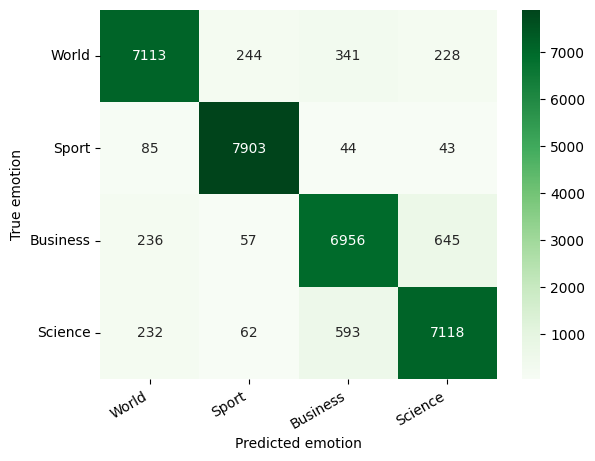

In [ ]:
print(classification_report(y_test, y_logreg, target_names=class_names))

cm = confusion_matrix(y_test, y_logreg)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

Для каждого класса были посчитаны свои коэффициенты регрессии. Они представляют матрицу $K \times n$, где $K$ — количество классов, $n$ — количество признаков (слов).

In [ ]:
coefficient_matrix = logreg.coef_
print(coefficient_matrix)
print(coefficient_matrix.shape)

[[-0.08903991 -0.10335647 -0.08556649 ... -0.17190466 -0.56320387
  -0.20378405]
 [-0.03535182 -0.10270224 -0.0981109  ... -0.04652553  0.90091328
   0.42843442]
 [ 0.19381418  0.19351434  0.29901173 ... -0.14530691  0.03708055
  -0.11512985]
 [-0.06942245  0.01254437 -0.11533433 ...  0.3637371  -0.37478995
  -0.10952051]]
(4, 17464)


 Каждый из коэффициентов регрессии описывает размер вклада соответствующего признака.
 - Положительный коэффициент — признак повышает вероятность принадлежности к классу, отрицательный коэффициент — признак уменьшает вероятность.
 - Большой коэффициент — признак существенно влияет на вероятность принадлежности к классу, почти нулевой коэффициент — признак имеет небольшое влияние на вероятность результата.

Выведем признаки с самыми большими коэффициентами для каждого класса и получим наиболее характерные слова для каждой эмоции.
- Необходимо определить порядок, в котором должны быть записаны коэффициенты и слова по возрастанию. Это можно сделать с помощью метода `.argsort()`.

In [ ]:
order = coefficient_matrix[0].argsort()
order

array([ 7789, 14602,  6146, ...,  7893,  7892,   277])

- В этом порядке нужно сортировать коэффициенты `coefficient_matrix[0]` и слова `tf_idf.get_feature_names_out()`. Чтобы получить порядок по убыванию, нужно развернуть массивы.

In [ ]:
coefficient_matrix[0][order][::-1]

array([ 7.18274753,  5.63182738,  4.87965152, ..., -2.70499177,
       -2.71738982, -3.43438614])

In [ ]:
vect.get_feature_names_out()[order][::-1]

array(['afp', 'iraq', 'iraqi', ..., 'game', 'sport', 'internet'],
      dtype=object)

Выполним то же самое в цикле, проходя по коэффициентам каждого класса.
- Создаем список признаков-слов
- Выводим название класса
- Записываем индексы в порядке возрастания коэффициентов (`order`)
- Сортируем коэффициенты (`class_coefficients`) и слова (`feature_names`), переворачиваем массив и записываем топ-5 значений
- Выводим слова и коэффициенты

In [ ]:
for i in range(coefficient_matrix.shape[0]):

    print(f"\n{class_names[i]}:")

    feature_names = vect.get_feature_names_out() # список признаков-слов
    order = coefficient_matrix[i].argsort()
    class_coefficients = coefficient_matrix[i][order][::-1][:5]
    feature_names = feature_names[order][::-1][:5]

    for feature, coefficient in zip(feature_names, class_coefficients):
      print(feature, coefficient.round(2))


World:
afp 7.18
iraq 5.63
iraqi 4.88
kill 4.44
un 4.39

Sport:
coach 6.46
cup 5.72
sport 5.61
team 5.47
player 4.68

Business:
economy 4.27
company 4.23
retailer 4.18
bank 4.15
hellip 4.08

Science:
nasa 5.61
space 5.5
internet 5.47
scientist 4.92
software 4.83


### Дерево решений

Обучение модели на основе [дерева решений](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html) займет около 3 минут.

Загрузим уже обученную модель с помощью метода `load()` модуля [joblib](https://joblib.readthedocs.io/en/latest/generated/joblib.load.html) и запишем предсказания (см. [пример](https://scikit-learn.org/1.3/model_persistence.html)).

In [ ]:
"""
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=42)
dectree.fit(X_train_vect, y_train)
"""

'\nfrom sklearn.tree import DecisionTreeClassifier\n\ndectree = DecisionTreeClassifier(random_state=42)\ndectree.fit(X_train_vect, y_train)\n'

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/1_intro_to_nlp/dectree.joblib

--2024-10-10 10:38:57--  https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/1_intro_to_nlp/dectree.joblib
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2014553 (1.9M) [application/octet-stream]
Saving to: ‘dectree.joblib’

dectree.joblib      100%[===================>]   1.92M  --.-KB/s    in 0.1s    

2024-10-10 10:38:57 (19.5 MB/s) - ‘dectree.joblib’ saved [2014553/2014553]



In [ ]:
from joblib import load

dectree = load('dectree.joblib')
y_dectree = dectree.predict(X_test_vect)

In [ ]:
for i in range(20,25):
  print(f"Text:\n{news['Description'][X_test.index[i]]}")
  print(f"True label: {class_names[y_test[y_test.index[i]]-1]}")
  print(f"Predicted label: {class_names[y_dectree[i]-1]}\n")

Text:
After several missed calls by the line judge and chair umpire in Tuesday #39;s Jennifer Capriati-Serena Williams match that went against Williams, ESPN Research has compiled the top-10 controversies involving Serena and Venus Williams.
True label: Sport
Predicted label: Sport

Text:
 NEW YORK (Reuters) - Shares of Calpine Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=CPN.N target=/stocks/quickinfo/fullquote"&gt;CPN.N&lt;/A&gt; fell 6  percent before the bell on Tuesday following reports that one  of its joint ventures received a default notice.
True label: Business
Predicted label: Business

Text:
WASHINGTON (AFP) - Revenge is on the mind of the Green Bay Packers as they enter a pivotal National Football League game Sunday at Philadelphia, where the Eagles made an amazing rally to oust them in last season #39;s playoffs.
True label: Sport
Predicted label: Sport

Text:
Credit Suisse will on Monday announce a wide restructuring that will integrate its vola

              precision    recall  f1-score   support

       World       0.82      0.82      0.82      7926
       Sport       0.88      0.89      0.88      8075
    Business       0.77      0.77      0.77      7894
     Science       0.78      0.77      0.77      8005

    accuracy                           0.81     31900
   macro avg       0.81      0.81      0.81     31900
weighted avg       0.81      0.81      0.81     31900



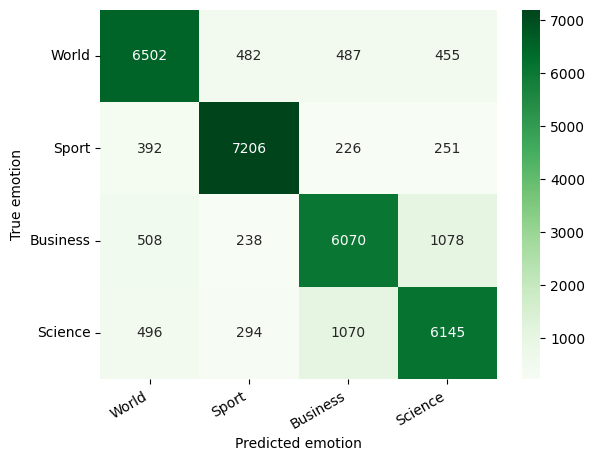

In [ ]:
print(classification_report(y_test, y_dectree, target_names=class_names))

cm = confusion_matrix(y_test, y_dectree)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

Плюсом деревьев решений является их интерпретируемость — для каждого предсказания можно вывести цепочку условий, которая привела к такому выводу.

In [ ]:
from sklearn.tree import export_text

text_representation = export_text(dectree,
                                  class_names=class_names,
                                  feature_names=list(vect.get_feature_names_out()))
print(text_representation)

|--- iraq <= 0.07
|   |--- kill <= 0.07
|   |   |--- win <= 0.07
|   |   |   |--- oil <= 0.10
|   |   |   |   |--- microsoft <= 0.02
|   |   |   |   |   |--- company <= 0.05
|   |   |   |   |   |   |--- game <= 0.03
|   |   |   |   |   |   |   |--- minister <= 0.03
|   |   |   |   |   |   |   |   |--- president <= 0.06
|   |   |   |   |   |   |   |   |   |--- team <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- profit <= 0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 528
|   |   |   |   |   |   |   |   |   |   |--- profit >  0.10
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 61
|   |   |   |   |   |   |   |   |   |--- team >  0.08
|   |   |   |   |   |   |   |   |   |   |--- scientist <= 0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 118
|   |   |   |   |   |   |   |   |   |   |--- scientist >  0.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   

### Метод случайного леса

Поскольку метод случайного леса является ансамблем деревьев решений, обучение модели займет больше времени (около 7 минут). Сама модель весит больше 100МБ, поэтому загружена на гитхаб в виде архива.

Скачаем модель и разархивируем её.

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_vect, y_train)
"""

'\nfrom sklearn.ensemble import RandomForestClassifier\n\nrfc = RandomForestClassifier(random_state=42)\nrfc.fit(X_train_vect, y_train)\n'

In [ ]:
!wget https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/1_intro_to_nlp/rfc.zip

--2024-10-10 10:40:04--  https://raw.githubusercontent.com/Xeanst/NLP_course_FBB/main/1_intro_to_nlp/rfc.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86480408 (82M) [application/zip]
Saving to: ‘rfc.zip’

rfc.zip             100%[===================>]  82.47M   161MB/s    in 0.5s    

2024-10-10 10:40:07 (161 MB/s) - ‘rfc.zip’ saved [86480408/86480408]



In [ ]:
!unzip /content/rfc.zip

Archive:  /content/rfc.zip
  inflating: rfc.joblib              


Загрузим уже обученную модель с помощью метода `load()` модуля joblib и запишем предсказания.

In [ ]:
from joblib import load

rfc = load('rfc.joblib')
y_rfc = rfc.predict(X_test_vect)

In [ ]:
for i in range(20,25):
  print(f"Text:\n{news['Description'][X_test.index[i]]}")
  print(f"True label: {class_names[y_test[y_test.index[i]]-1]}")
  print(f"Predicted label: {class_names[y_rfc[i]-1]}\n")

Text:
After several missed calls by the line judge and chair umpire in Tuesday #39;s Jennifer Capriati-Serena Williams match that went against Williams, ESPN Research has compiled the top-10 controversies involving Serena and Venus Williams.
True label: Sport
Predicted label: Sport

Text:
 NEW YORK (Reuters) - Shares of Calpine Corp. &lt;A HREF="http://www.investor.reuters.com/FullQuote.aspx?ticker=CPN.N target=/stocks/quickinfo/fullquote"&gt;CPN.N&lt;/A&gt; fell 6  percent before the bell on Tuesday following reports that one  of its joint ventures received a default notice.
True label: Business
Predicted label: Business

Text:
WASHINGTON (AFP) - Revenge is on the mind of the Green Bay Packers as they enter a pivotal National Football League game Sunday at Philadelphia, where the Eagles made an amazing rally to oust them in last season #39;s playoffs.
True label: Sport
Predicted label: Sport

Text:
Credit Suisse will on Monday announce a wide restructuring that will integrate its vola

              precision    recall  f1-score   support

       World       0.91      0.88      0.89      7926
       Sport       0.92      0.97      0.95      8075
    Business       0.86      0.85      0.86      7894
     Science       0.87      0.85      0.86      8005

    accuracy                           0.89     31900
   macro avg       0.89      0.89      0.89     31900
weighted avg       0.89      0.89      0.89     31900



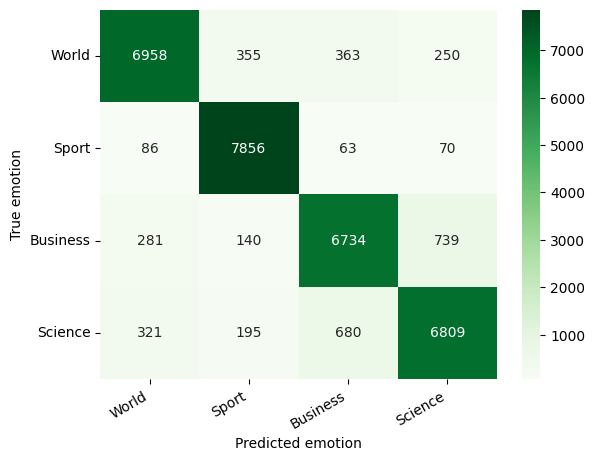

In [ ]:
print(classification_report(y_test, y_rfc, target_names=class_names))

cm = confusion_matrix(y_test, y_rfc)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

### Сравнение результатов

Отобразим результаты для всех 4 моделей в виде столбчатой диаграммы.

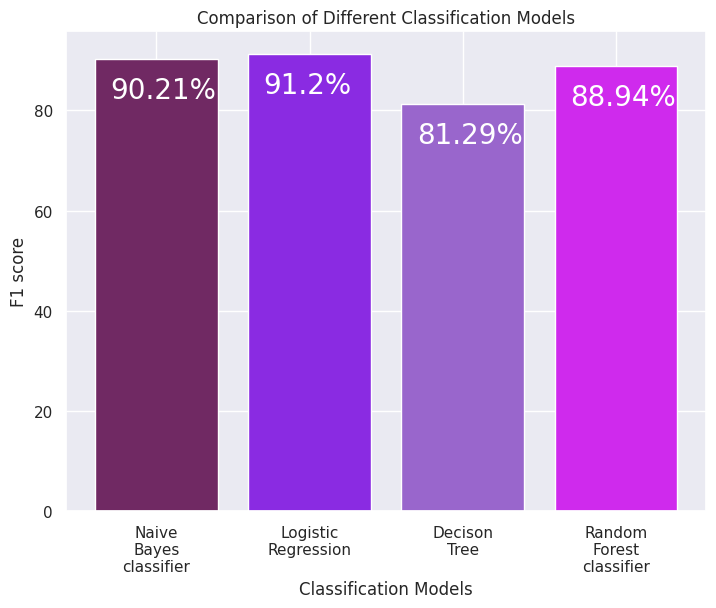

In [ ]:
mnb_f1 = round(f1_score(y_mnb, y_test, average='weighted')*100,4)
logreg_f1 = round(f1_score(y_logreg, y_test, average='weighted')*100,4)
dectree_f1 = round(f1_score(y_dectree, y_test, average='weighted')*100,4)
rfc_f1 = round(f1_score(y_rfc, y_test, average='weighted')*100,4)

sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Naive\nBayes\nclassifier", "Logistic\nRegression",
          "Decison\nTree", "Random\nForest\nclassifier"]
Accuracy=[mnb_f1, logreg_f1, dectree_f1, rfc_f1]
ax.bar(Models,Accuracy,color=['#702963','#8a2be2', '#9966cc', '#cf2aed']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-7.8, str(round(i.get_height(),2))+'%', fontsize=20, color='white')
plt.title('Comparison of Different Classification Models')
plt.ylabel('F1 score')
plt.xlabel('Classification Models')

plt.show()

Мы получили довольно высокое качество, но можно ли еще улучшить его? Например, за счет гиперпараметров векторизации?

## Подбор гиперпараметров

Можно произвести **несколько разбиений** датасета на **обучающий и валидационный**, чтобы получить уверенность оценок качества для моделей с разными гиперпараметрами.

Такой подход называется [K-Fold кросс-валидация](https://scikit-learn.org/stable/modules/cross_validation.html) — перекрестная проверка.

1. Фиксируется целое число $k$, меньшее числа примеров в датасете.
2. Датасет разбивается на $k$ одинаковых частей.
3. Происходит $k$ итераций, в каждой из которых одна часть выступает в роли валидационного множества, а объединение остальных — в роли тренировочного.
4. Финальный результат модели измеряется на отложенном тестовом множестве, не участвовавшем в кросс-валидации.

<center><img src ="https://i.postimg.cc/Wpfzmq7K/cross_validation.png" width="600"></center>

Попробуем определить наиболее оптимальные параметры векторизации с помощью кросс-валидации.

Все этапы обработки — векторизацию и классификацию — объединим  в [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

В качестве алгоритма для векторизации будем использовать [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html), для классификации обучим [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('clf', MultinomialNB())
])

Создайдим словарь `parameters`, содержащий диапазон значений каждого параметра:
- `ngram_range`

По умолчанию в качестве признаков используются слова — униграммы (`default=(1, 1)`). С помощью параметра `ngram_range` можно считать частоту встречаемости для *n*-грамм. Необходимо задать значения `min_n` и `max_n`. Например, при `ngram_range=(1, 3)` в словарь войдут униграммы, биграммы и триграммы.
- `max_df`

По умолчанию включаются слова из всех 100% документов (`default=1.0`). Можно ограничить размер словаря и включать только слова, которые встречаются слишком часто и являются стоп-словами в пределах данного корпуса. Например, при `max_df=0.5` — исключаем токены, которые встретились в больше чем 50% документов.

In [ ]:
parameters = {
    'vect__ngram_range': ((1,1), (1, 3)),
    'vect__max_df': (0.5, 1.0)
}

Для автоматического подбора параметров будем использовать модуль [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). Он создает модель для каждой возможной комбинации параметров.

Для этого необходимо инициализировать объект `grid_search`, передавая ему пайплайн (векторизатор и модель). Установим количество кросс-валидаций, равное 5 (`cv=5`).

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline,
                           parameters,
                           n_jobs=-1,
                           verbose=1,
                           cv=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'vect__max_df': (0.5, 1.0),
                         'vect__ngram_range': ((1, 1), (1, 3))},
             verbose=1)

Выведем лучшие значения параметров.

In [ ]:
grid_search.best_params_

{'vect__max_df': 0.5, 'vect__ngram_range': (1, 3)}

Запишем результаты кросс-валидации в виде датафрейма и отобразим их на графике.

In [ ]:
grid_search_df = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
grid_search_df = grid_search_df.drop([
            'mean_fit_time',
            'std_fit_time',
            'mean_score_time',
            'std_score_time',
            'params',
            'std_test_score'],
            axis=1)
grid_search_df['param_vect__ngram_range'] = grid_search_df['param_vect__ngram_range'].astype(str)
grid_search_df

,param_vect__max_df,param_vect__ngram_range,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,rank_test_score
0,0.5,"(1, 3)",0.906113,0.909143,0.910188,0.912069,0.911024,0.909707,1
1,1.0,"(1, 3)",0.906113,0.909143,0.910188,0.912069,0.911024,0.909707,1
2,0.5,"(1, 1)",0.898224,0.902769,0.903292,0.903814,0.902769,0.902173,3
3,1.0,"(1, 1)",0.898224,0.902769,0.903292,0.903814,0.902769,0.902173,3


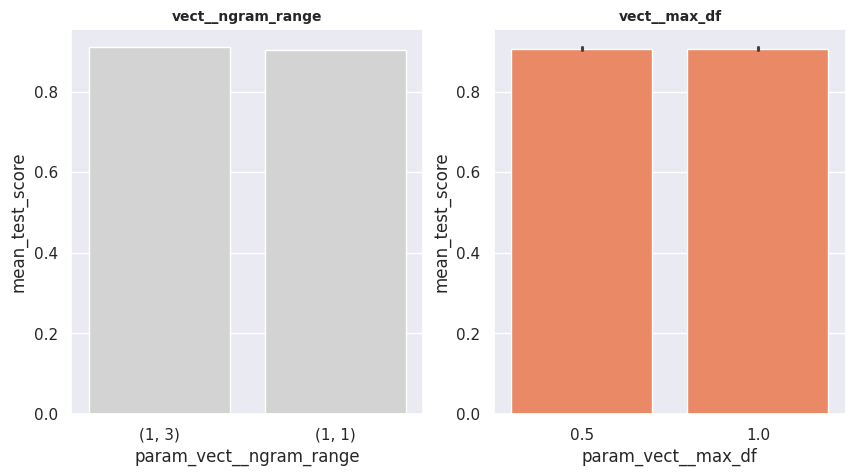

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, nrows=1)
sns.set(style="whitegrid", color_codes=True)
fig.set_size_inches(10,5)

sns.barplot(x='param_vect__ngram_range', y='mean_test_score', data=grid_search_df, ax=axs[0], color='lightgrey')
axs[0].set_title(label = 'vect__ngram_range', size=10, weight='bold')

sns.barplot(x='param_vect__max_df', y='mean_test_score', data=grid_search_df, ax=axs[1], color='coral')
axs[1].set_title(label = 'vect__max_df', size=10, weight='bold')

plt.show()

Инициализируем пайплайн с параметрами векторизатора, которые оказались наилучшими при кросс-валидации.

In [ ]:
pipeline = Pipeline([
           ('vect', TfidfVectorizer(ngram_range=grid_search.best_params_['vect__ngram_range'],
                                    max_df=grid_search.best_params_['vect__max_df'])),
           ('clf', MultinomialNB())
])

Обучим модель и запишем её предсказания на тестовых данных. Выведем отчет о классификации.

In [ ]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
class_names = ['World', 'Sport', 'Business', 'Science']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       World       0.92      0.90      0.91      7926
       Sport       0.95      0.98      0.97      8075
    Business       0.87      0.88      0.88      7894
     Science       0.90      0.88      0.89      8005

    accuracy                           0.91     31900
   macro avg       0.91      0.91      0.91     31900
weighted avg       0.91      0.91      0.91     31900



📌 Изменилось ли качество за счет автоматического подбора гиперпараметров?